#     Plot latitude and longitude profile comparisons of aircraft and model data, and compare both with binned data


## Setup imports

In [1]:
import matplotlib.pyplot as plt

import notebook_prepare as pre

## Define plotting function

Now that we've set up the imports, we can define the function producing the plots that we'll use later.

In [2]:
def display_figure(dimension,ax,plotdir,key,outcome,title,y_label):

    # Set the axes labels.
    if dimension=='Latitude':
        x_label='Latitude / degrees north'
    elif dimension=='Longitude':
        x_label='Longitude / degrees east'
    plt.xlabel(x_label,fontsize=50,labelpad=10)
    plt.ylabel(y_label,fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    if outcome == 'show':
        plt.show()
    elif outcome == 'save':
        plt.savefig(plotdir+key+'_'+title+'.png')
        plt.close()

In [3]:
def plot_profile(dimension,full_df,df,plotdir,key,label,a_colour,m_colour,bin,avg_method,min_method,max_method,model) :

    """
    Plot profile comparisons of aircraft and model data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    var_data = df[dimension]
    data = pre.read_data_values(df, model)

    # Plot the data.
    plt.scatter(var_data,data['a_avg'],s=50,c=a_colour,label='Aircraft')
    
    if(model):
        plt.scatter(var_data,data['m_avg'],s=50,c=m_colour,label='Model')     
        # Add a legend.
        plt.legend(fontsize=30,markerscale=2)

    display_figure(dimension,ax,plotdir,key,'show',f'{dimension}_Profile',label)

    """
    Plot profile comparisons of aircraft and model data with binned data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    data = pre.bin_data(dimension,full_df,avg_method,min_method,max_method,bin,model)

    # Plot the data.
    plt.plot(data['binned'],data['a_avg'],lw=5,c=a_colour,label='Aircraft')
    plt.fill_between(data['binned'],data['a_min'],data['a_max'],fc=a_colour,ec=None,alpha=0.5)
    
    if(model):
        plt.plot(data['binned'],data['m_avg'],lw=5,c=m_colour,label='Model')
        plt.fill_between(data['binned'],data['m_min'],data['m_max'],fc=m_colour,ec=None,alpha=0.5)
        # Add a legend.
        plt.legend(fontsize=30,markerscale=2)

    display_figure(dimension,ax,plotdir,key,'show',f'{dimension}_Profile_Binned',label)


## Specify the flight number, model data and what you want to plot

In [4]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M270'  

# Specify whether you have model data to plot.
model = True

# Specify if you want to plot latitude and/or longitude profiles.
latitude = True
longitude = True

## Prepare the data and plot for each pollution species

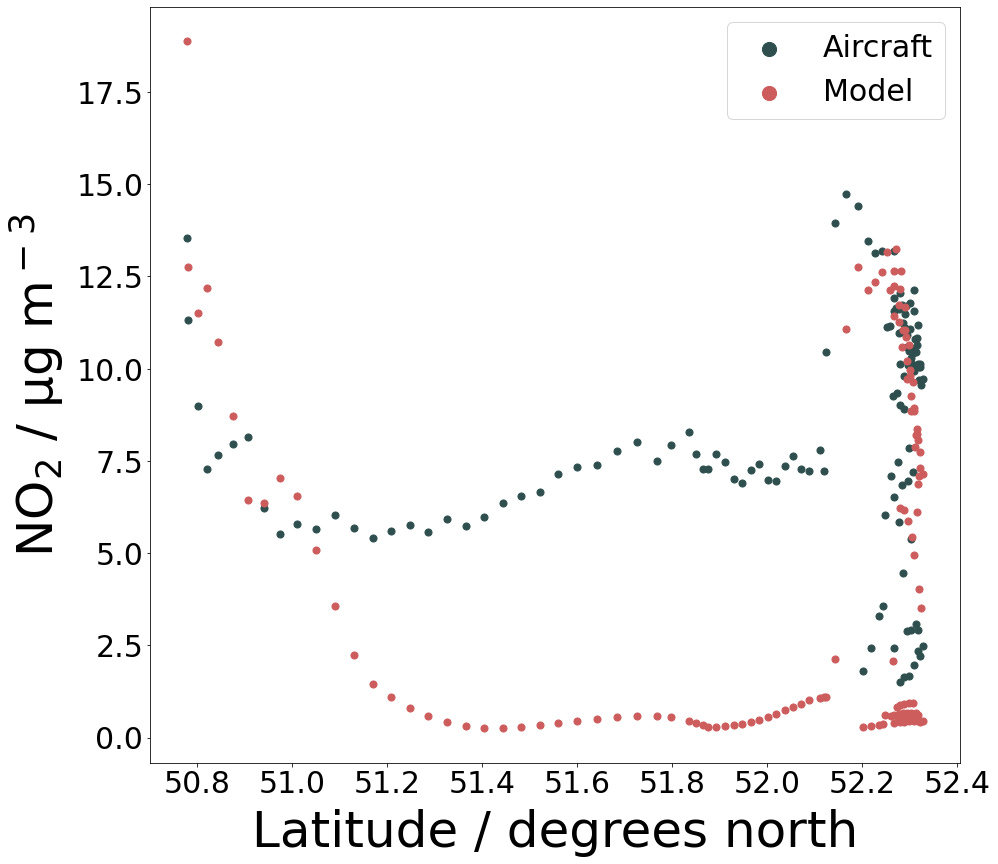

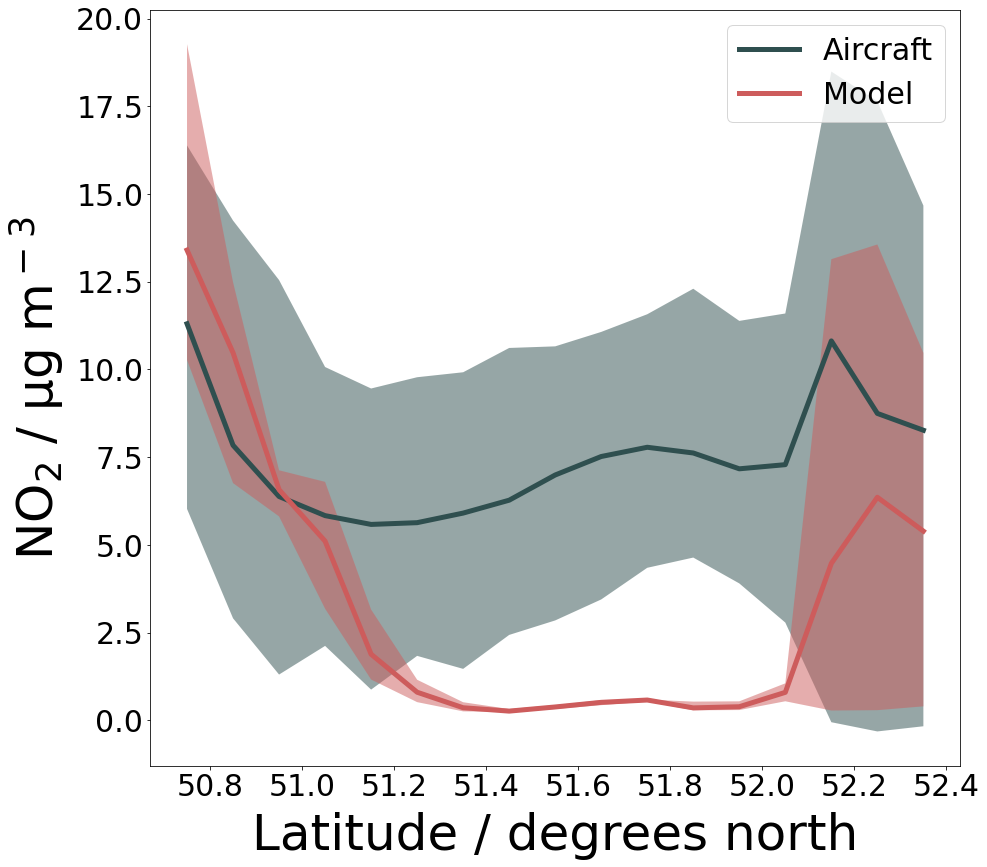

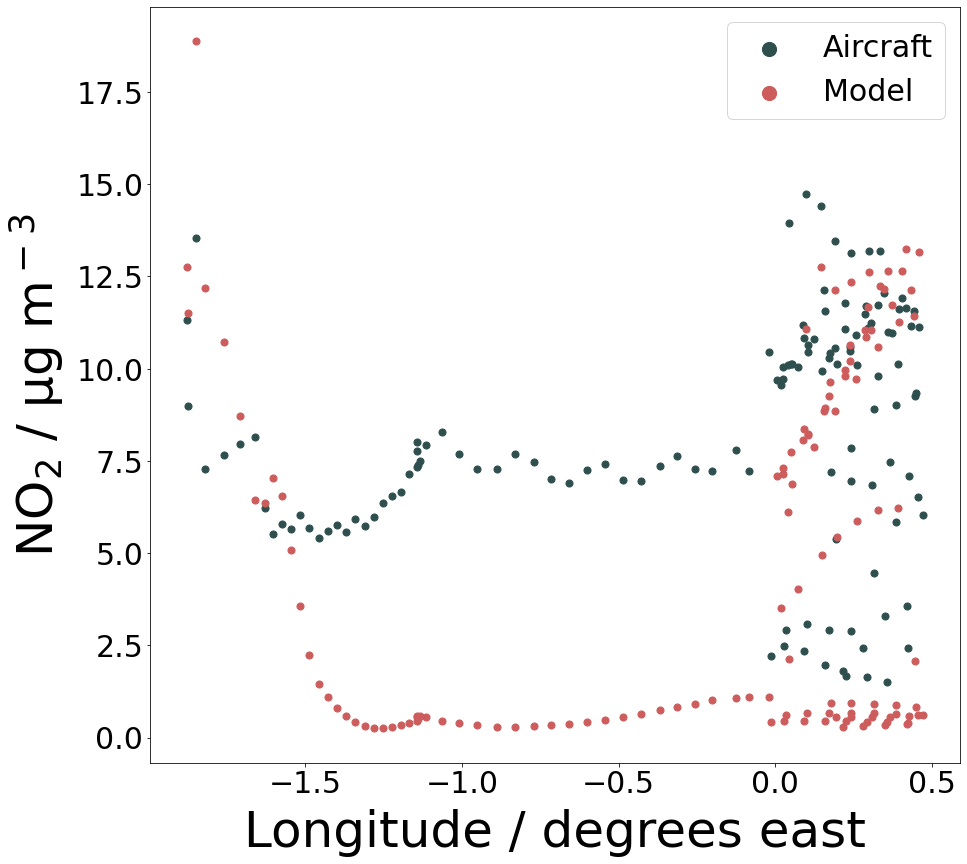

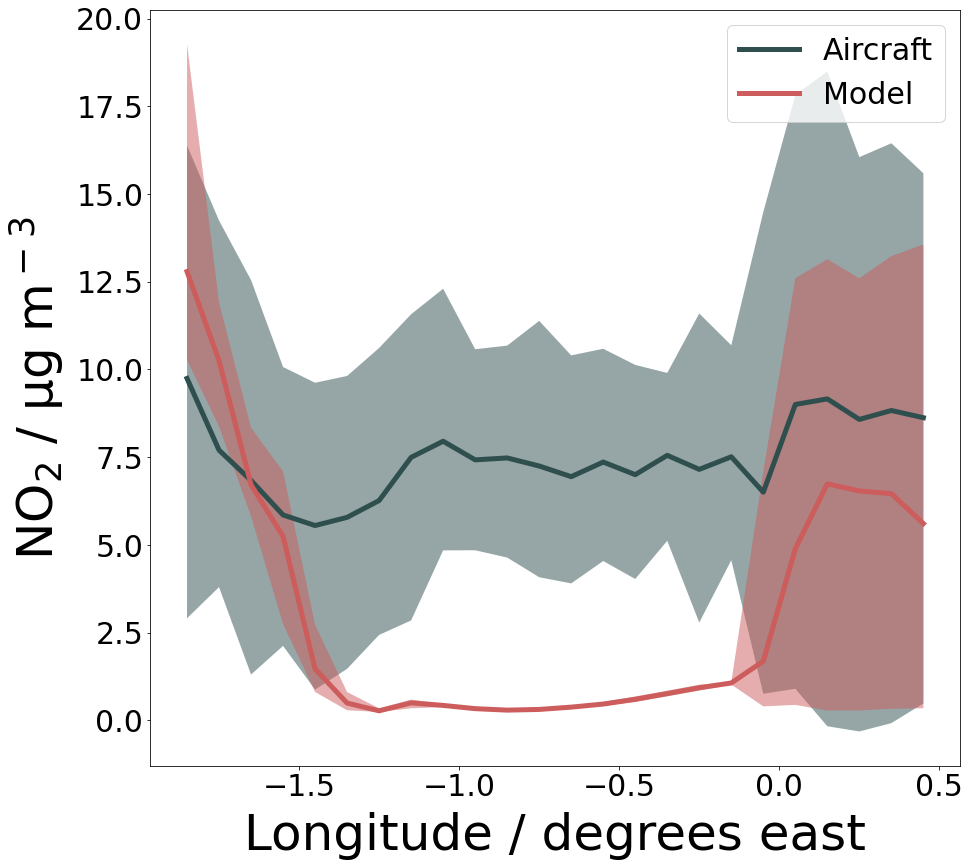

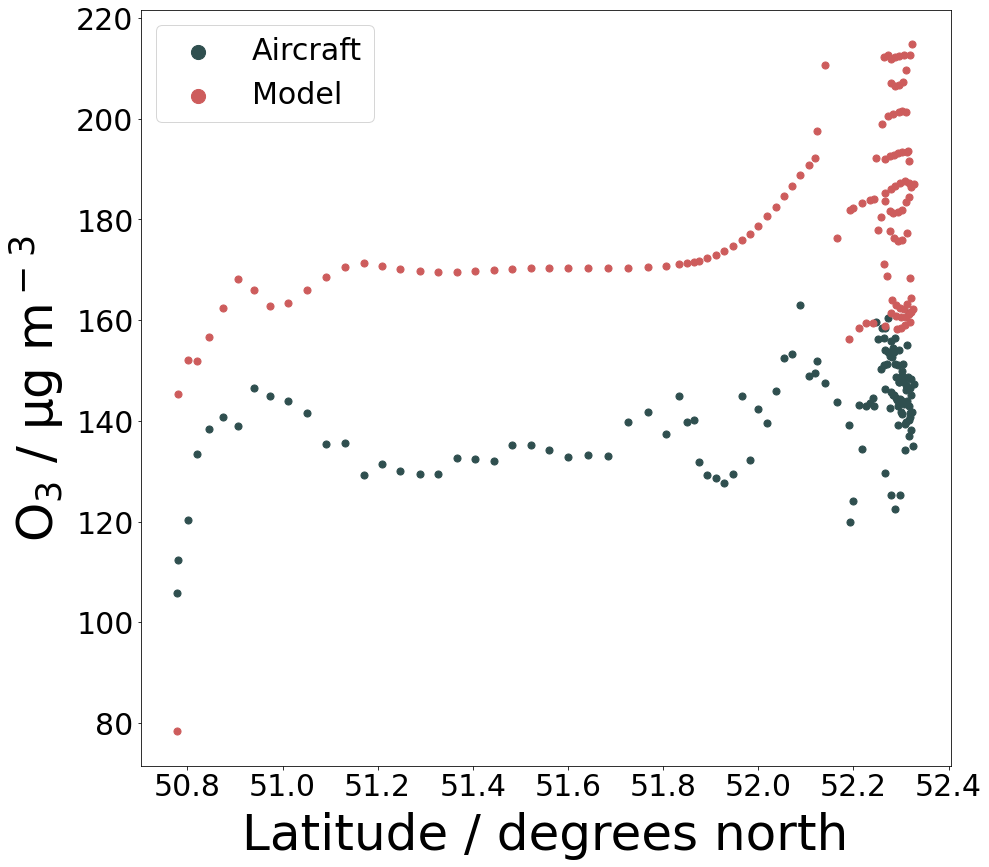

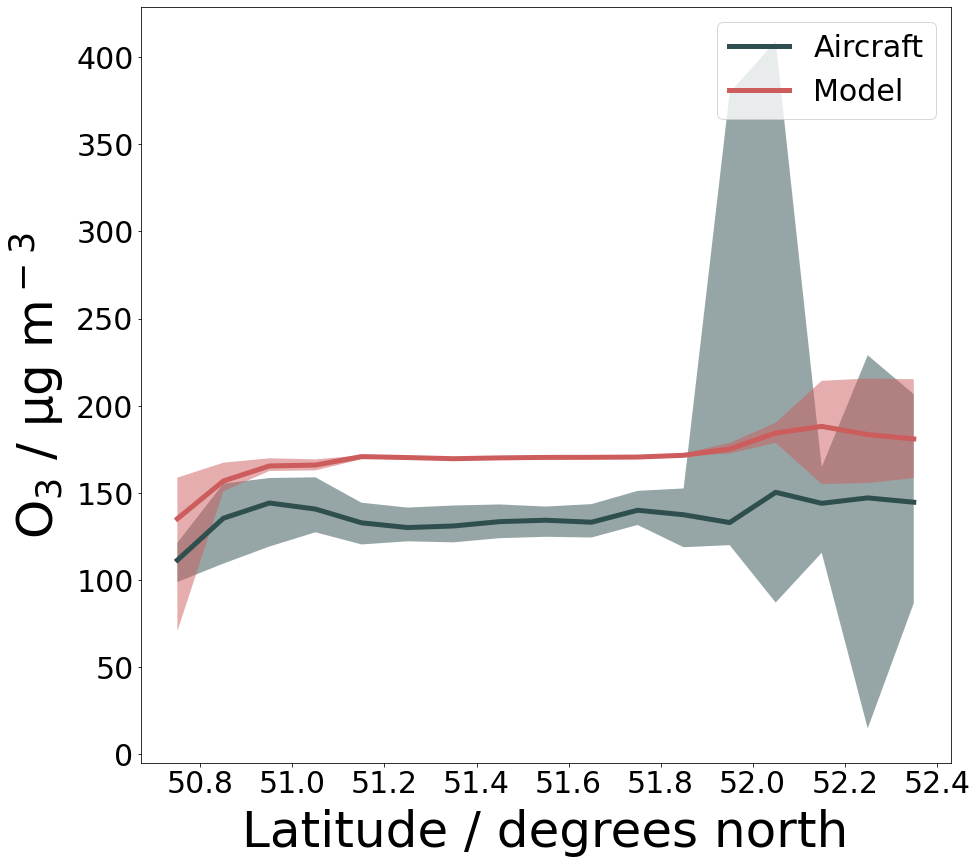

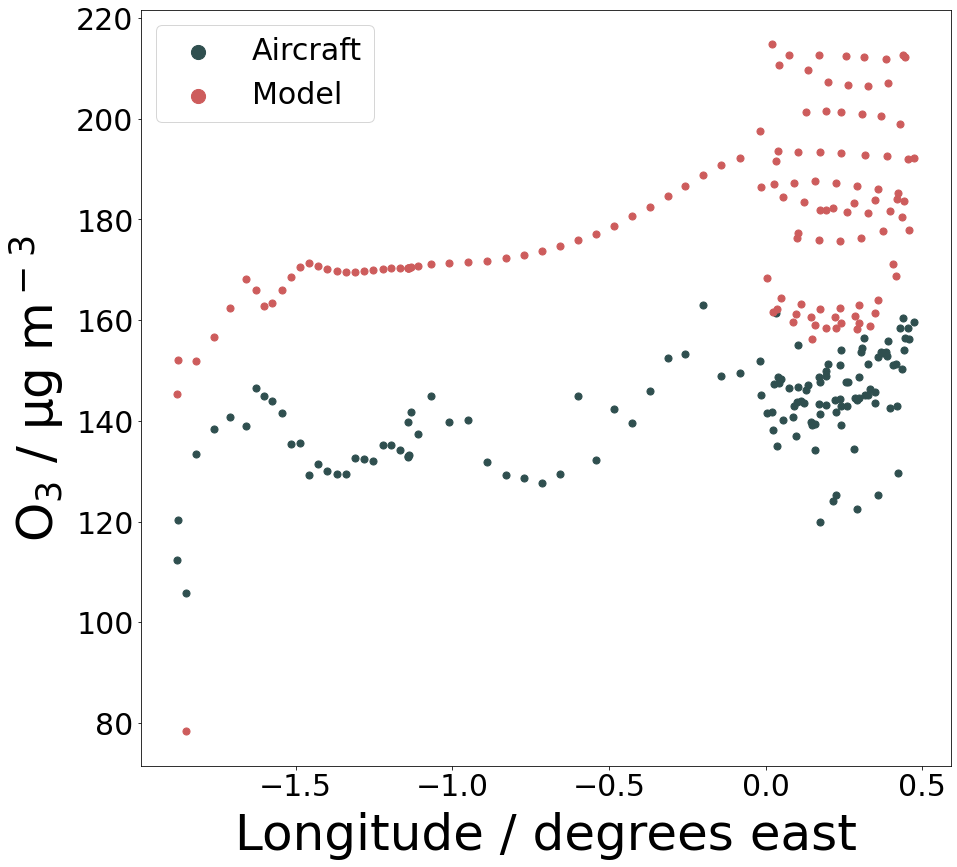

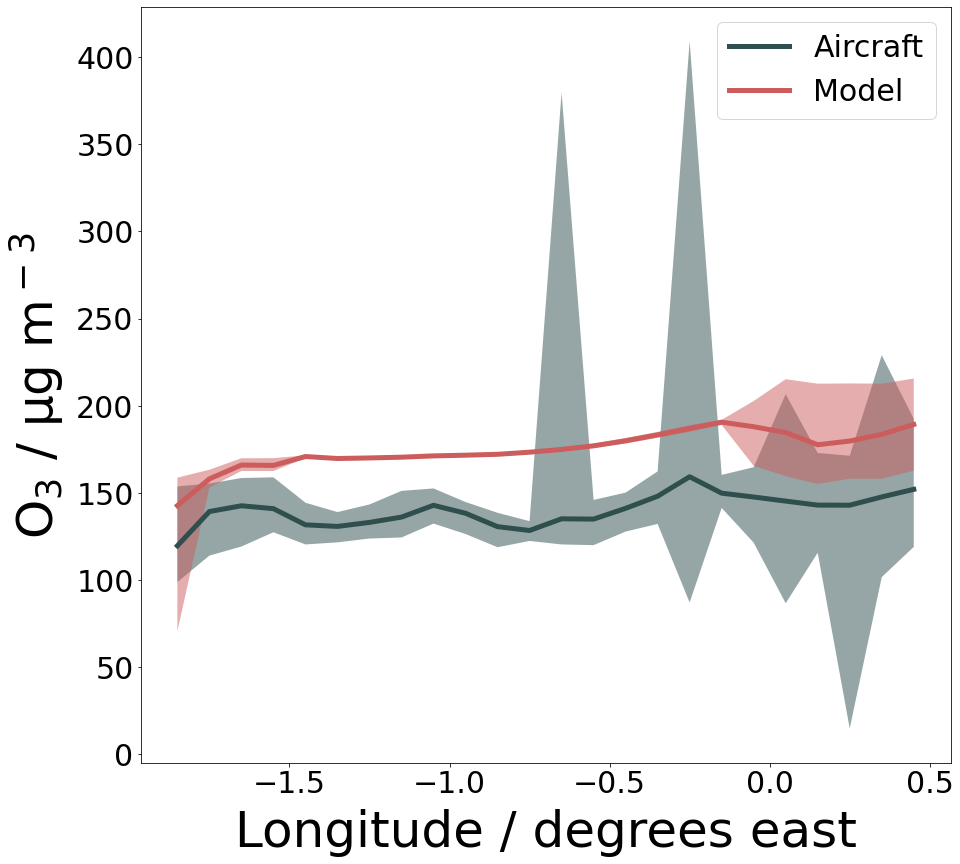

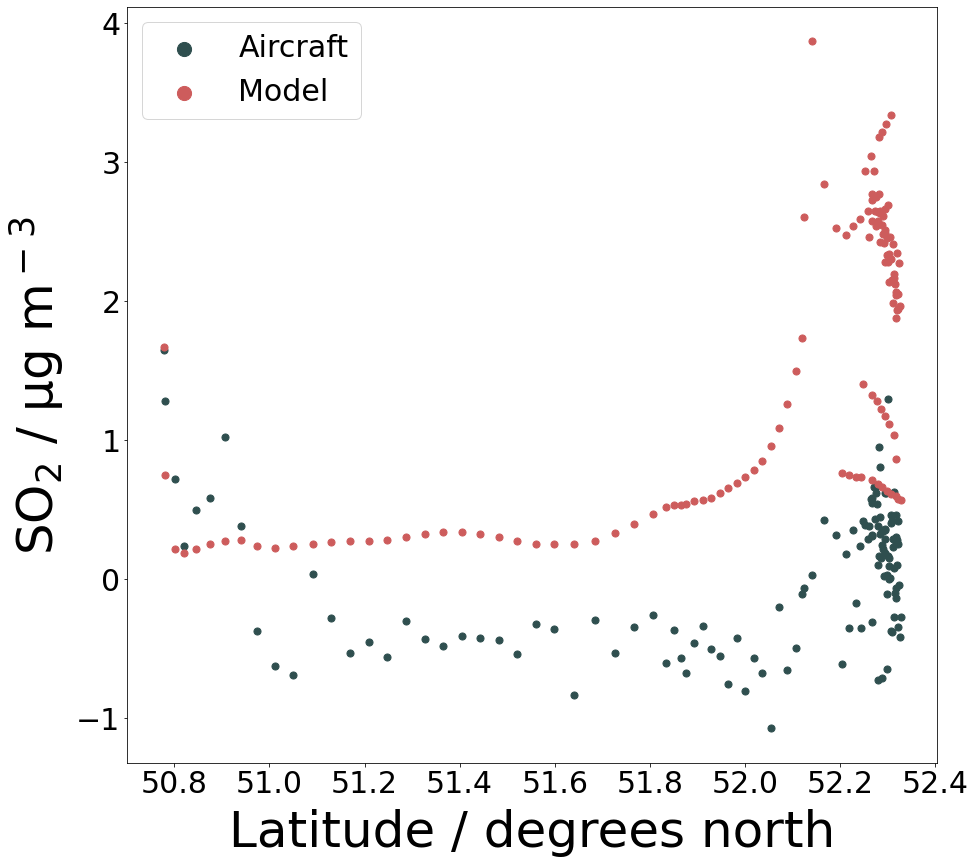

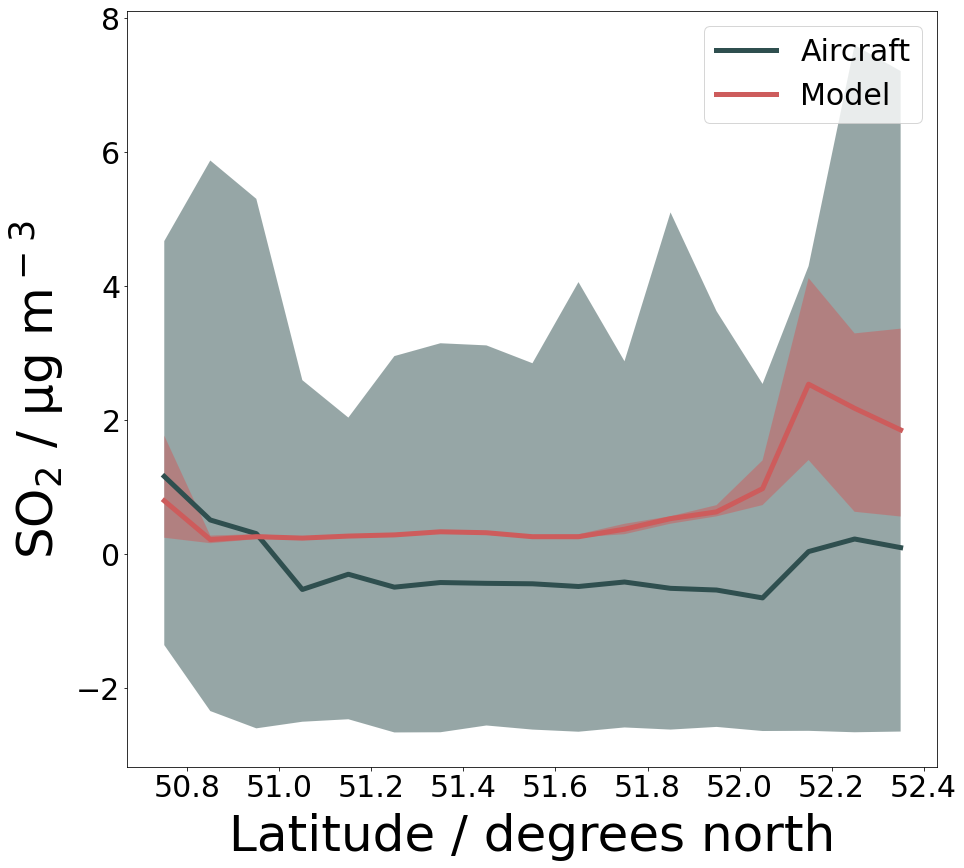

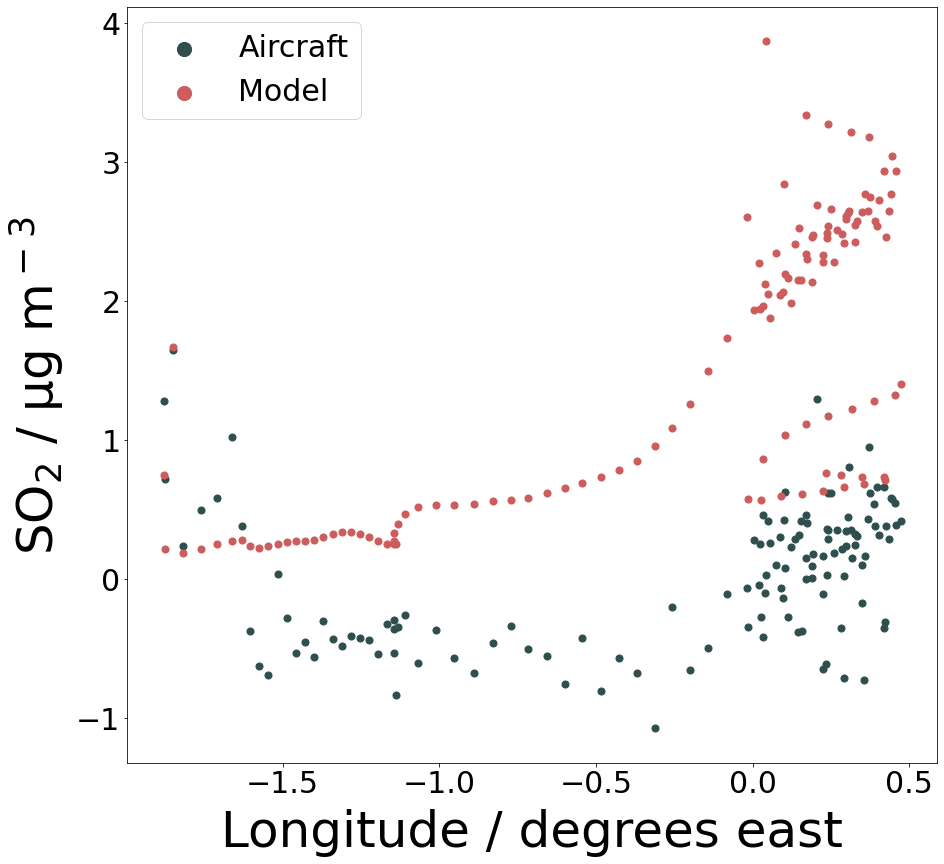

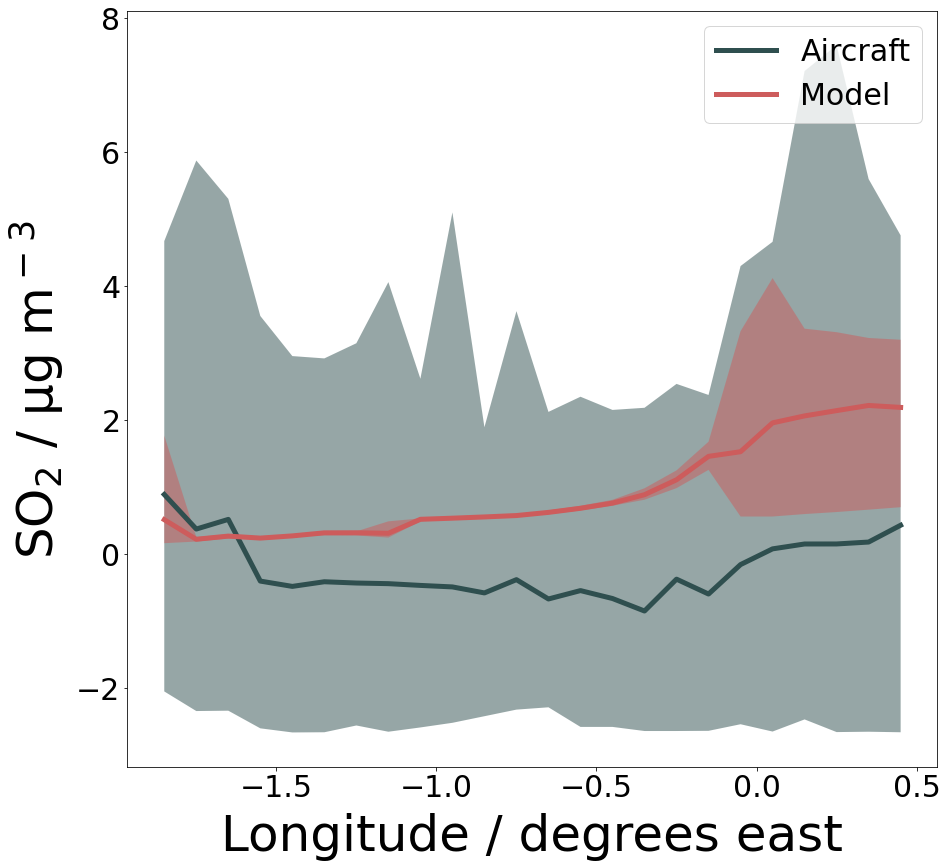

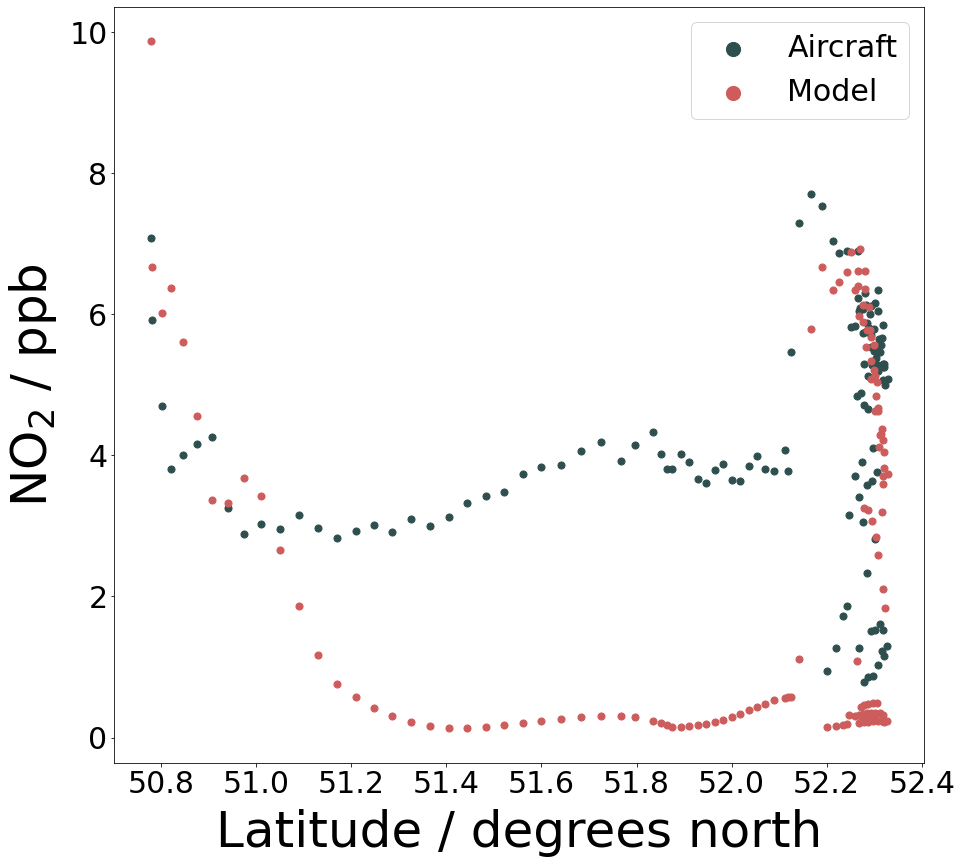

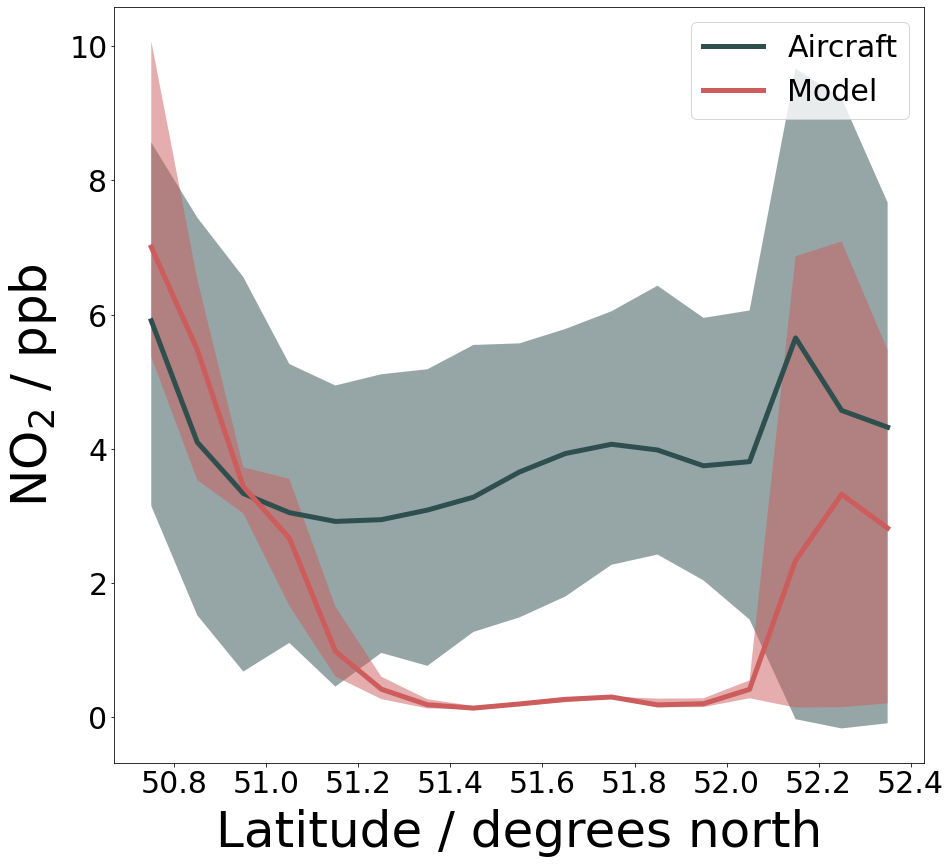

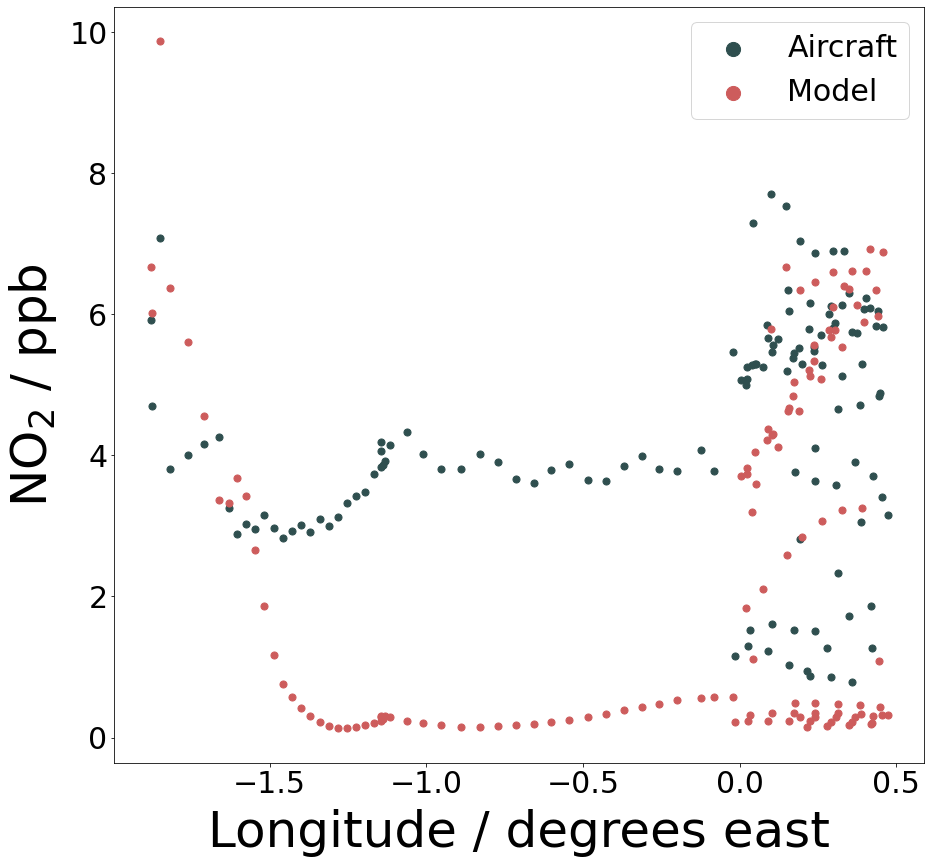

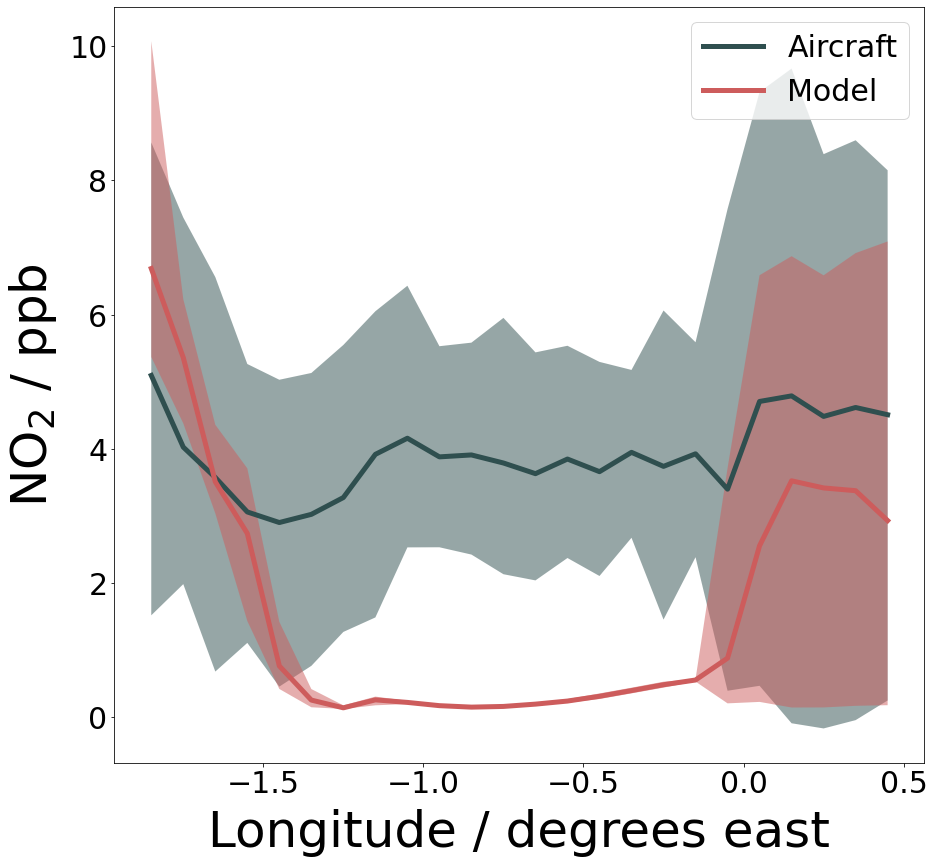

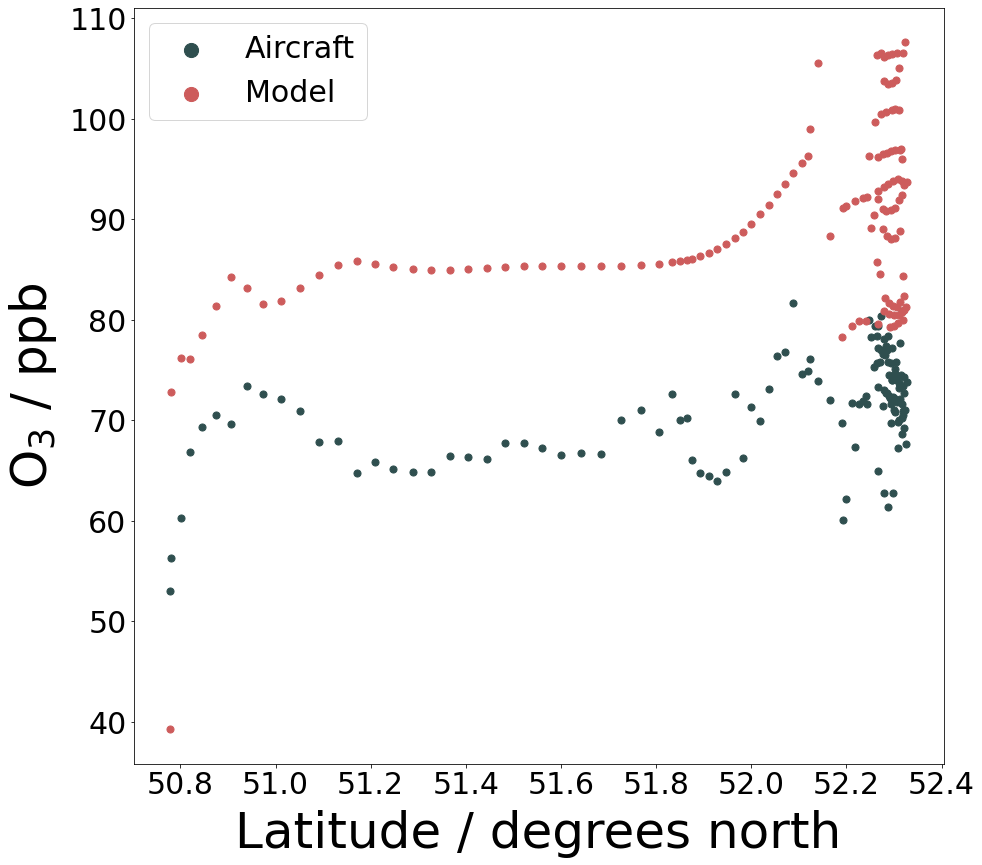

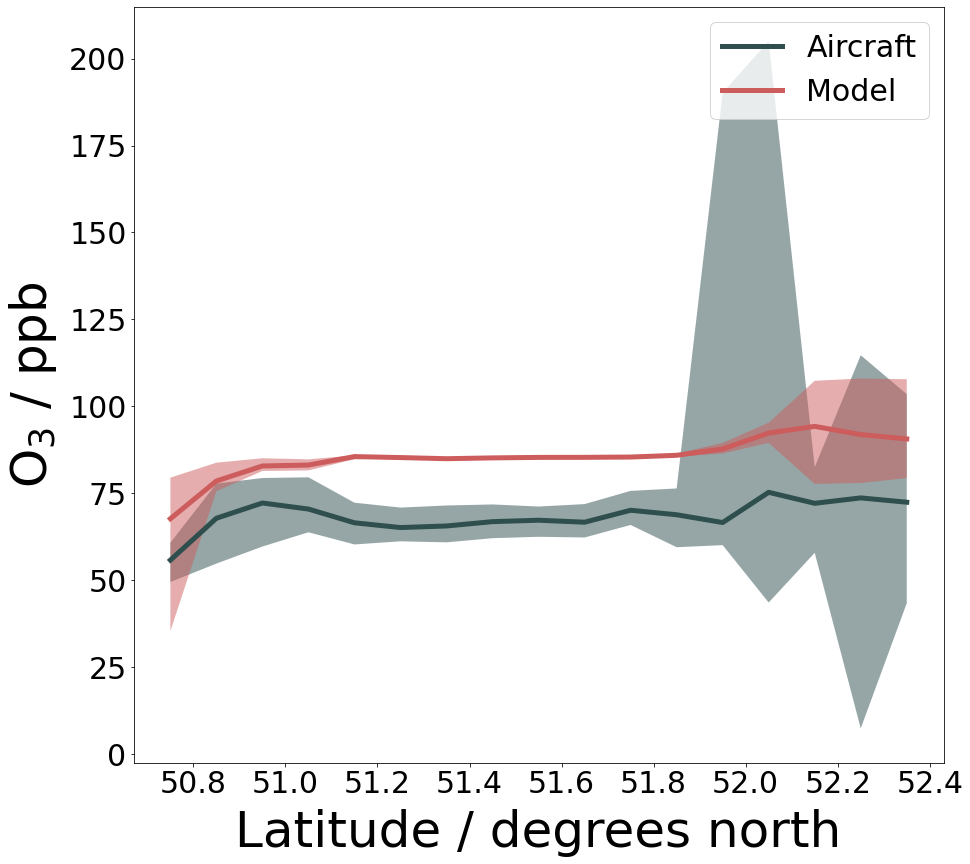

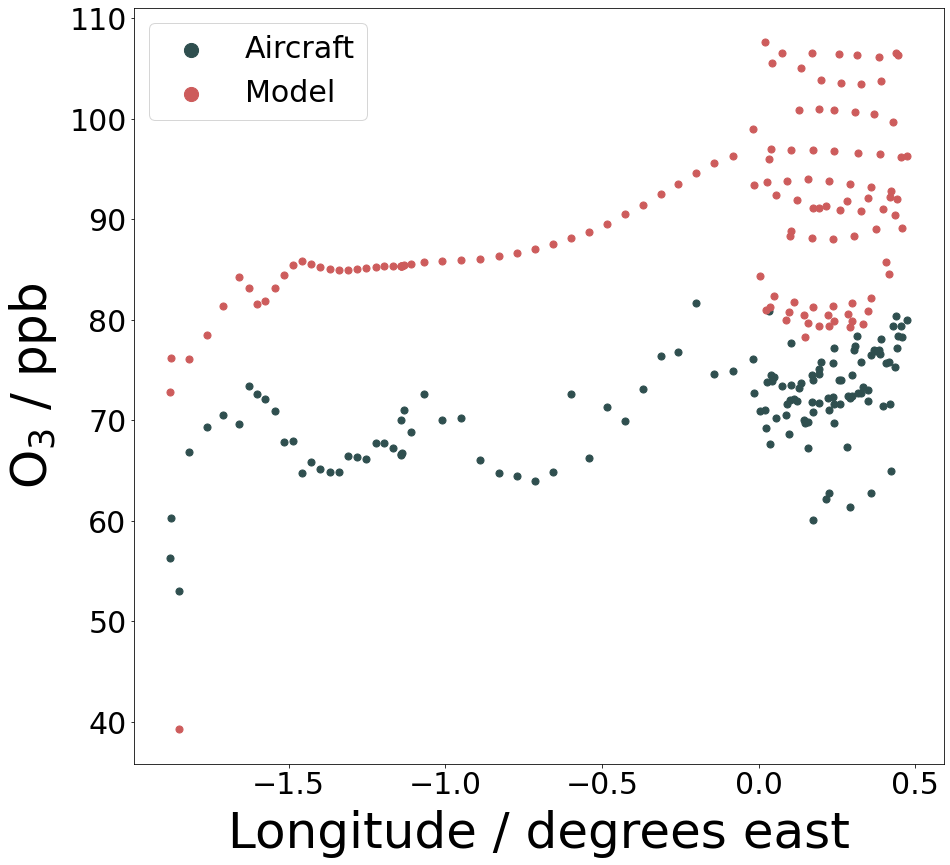

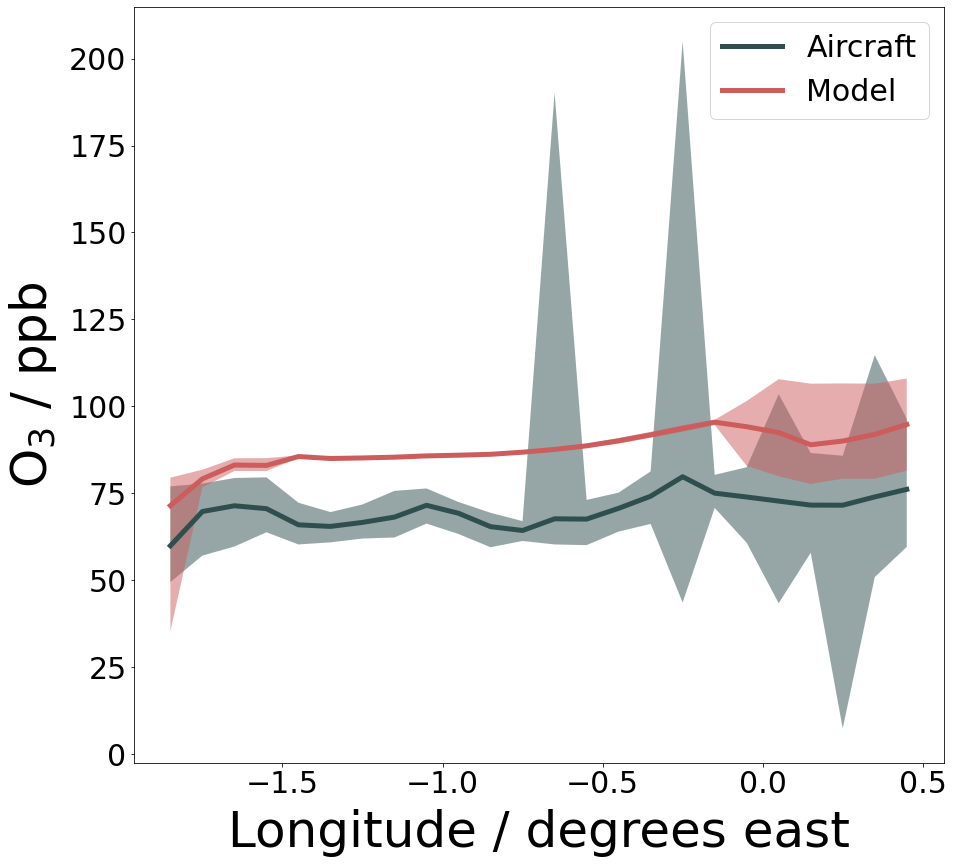

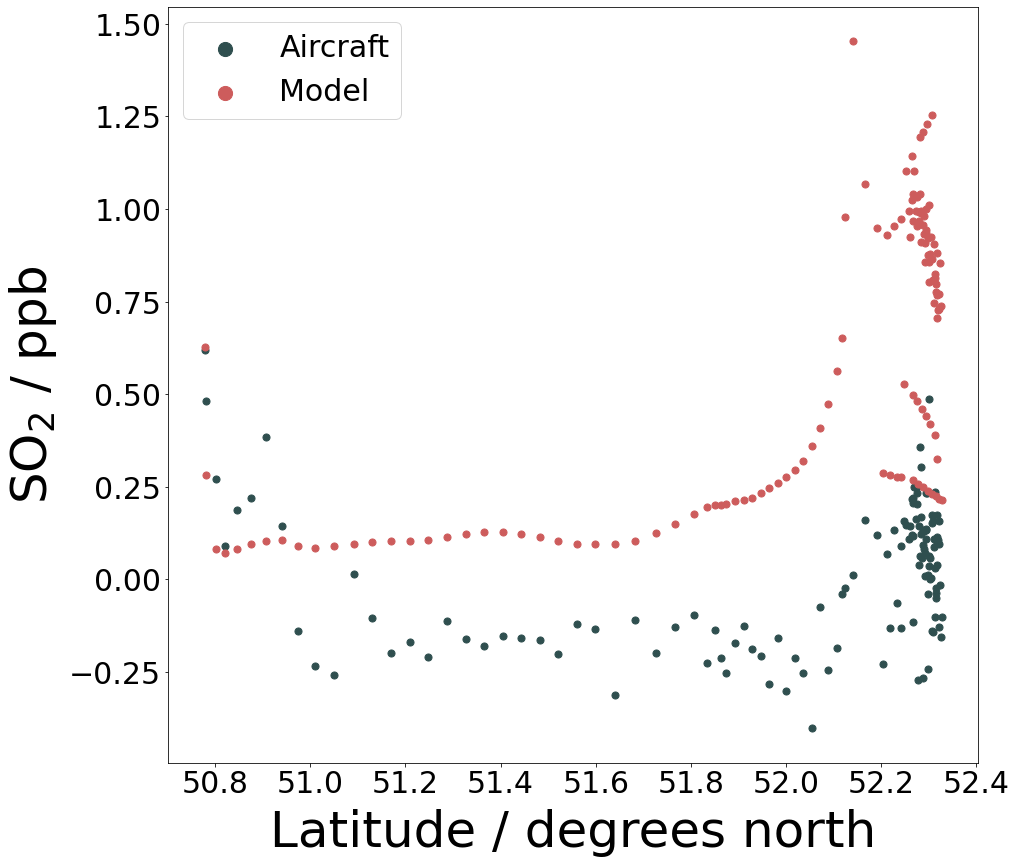

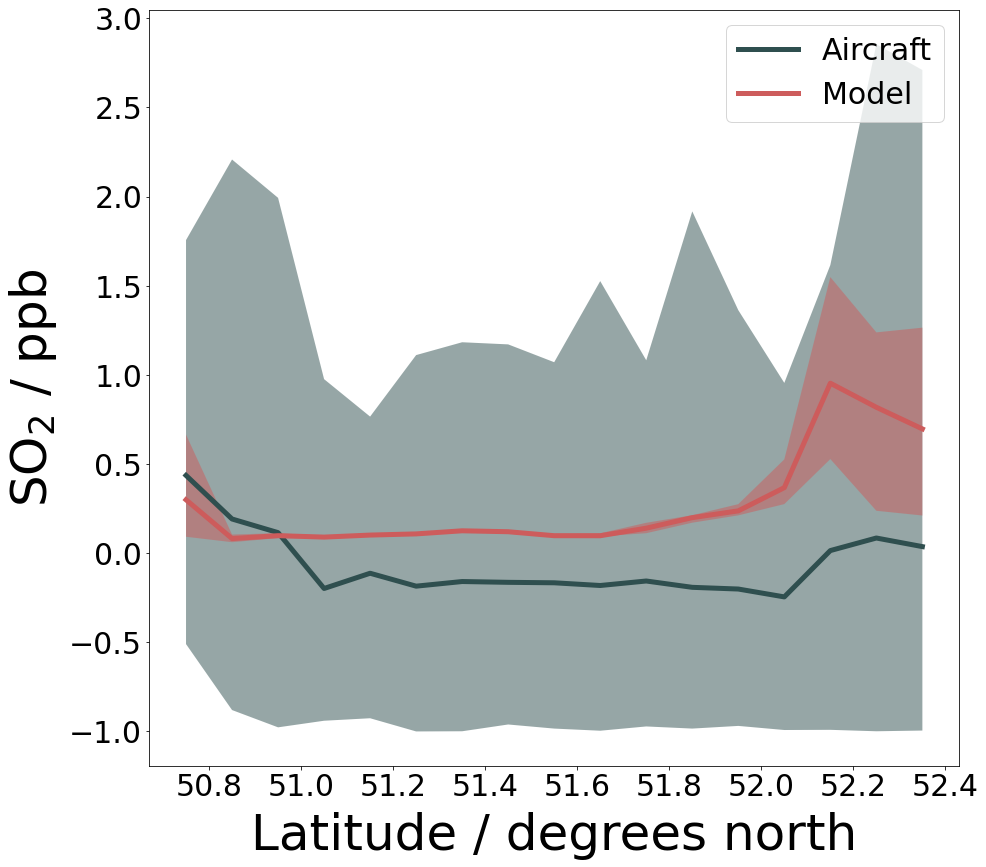

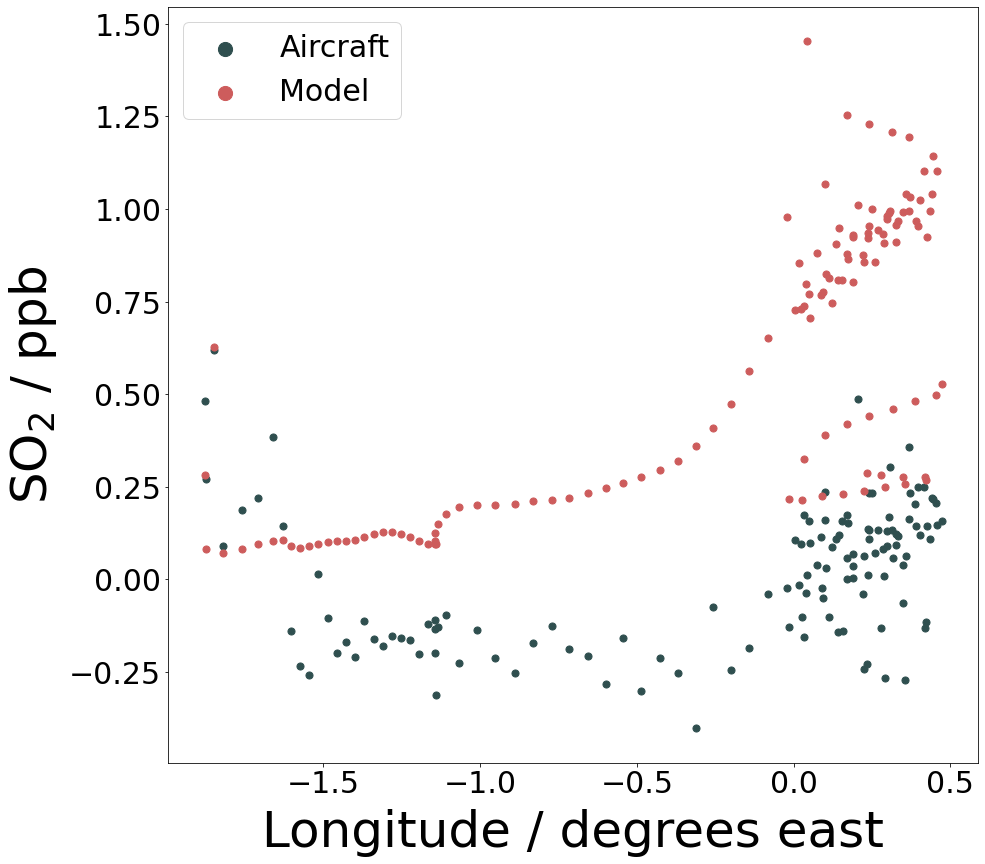

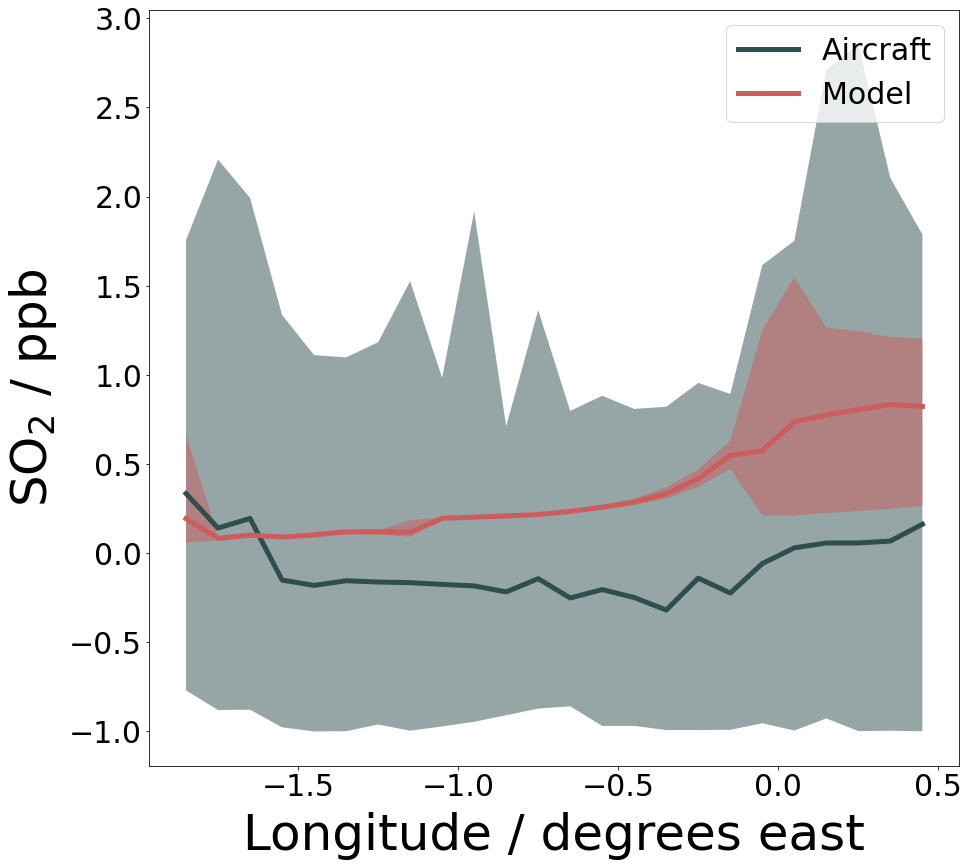

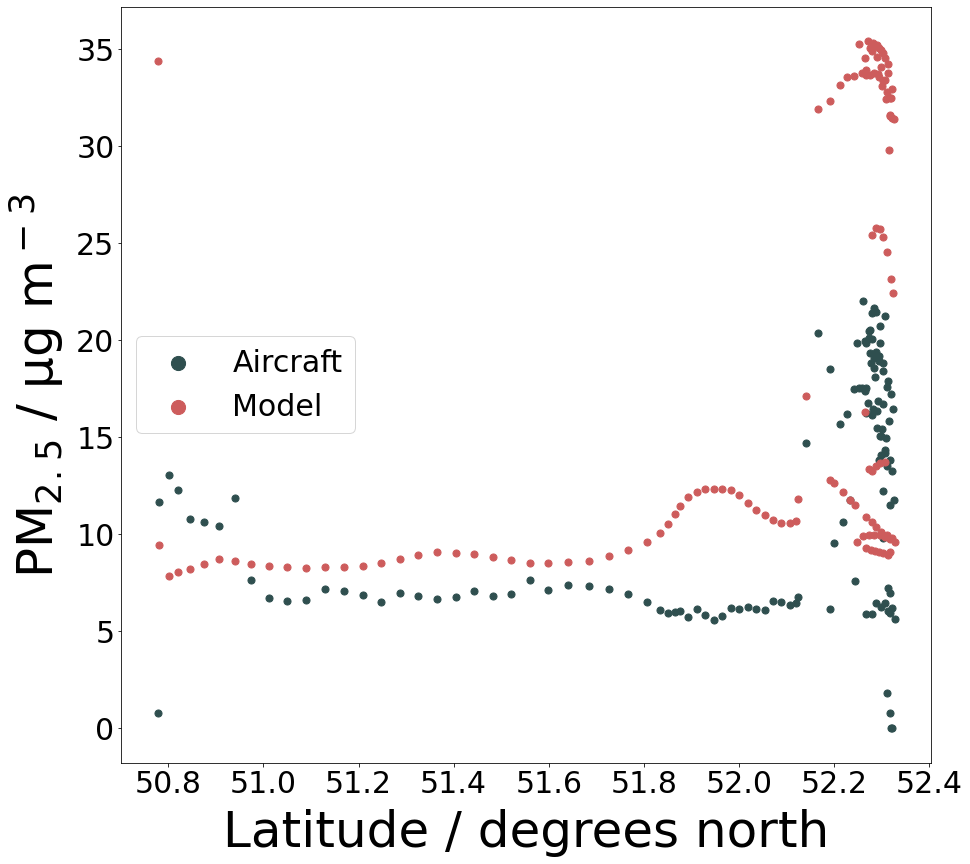

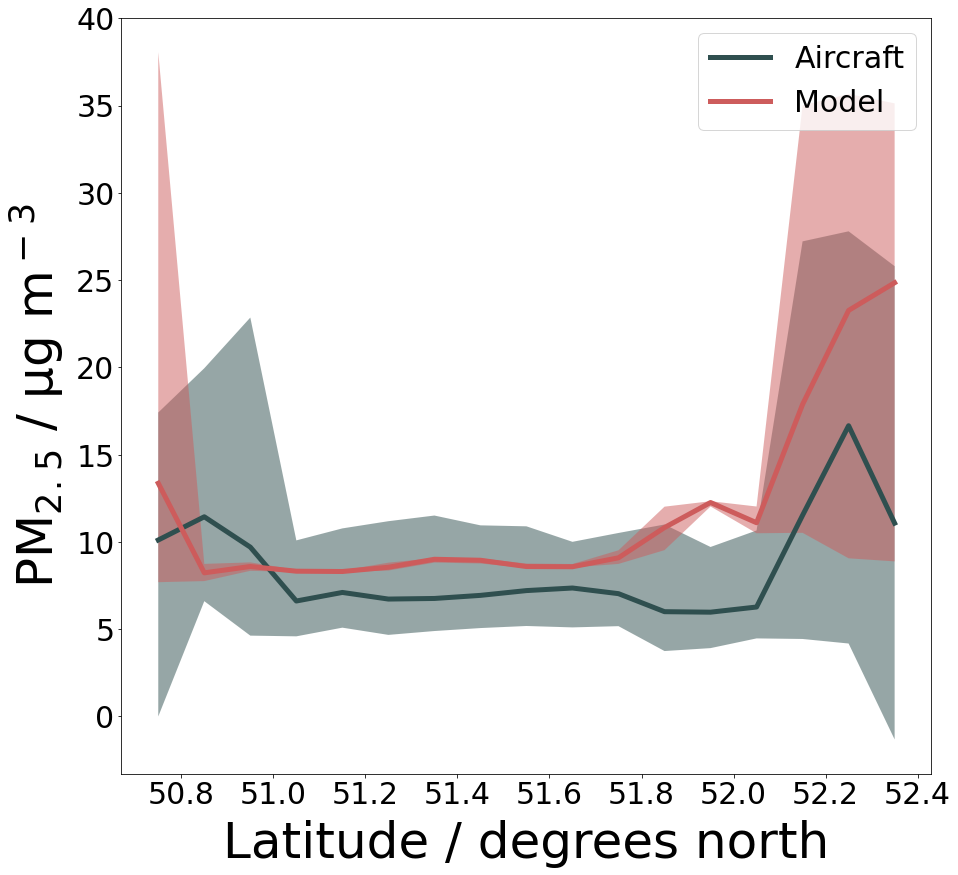

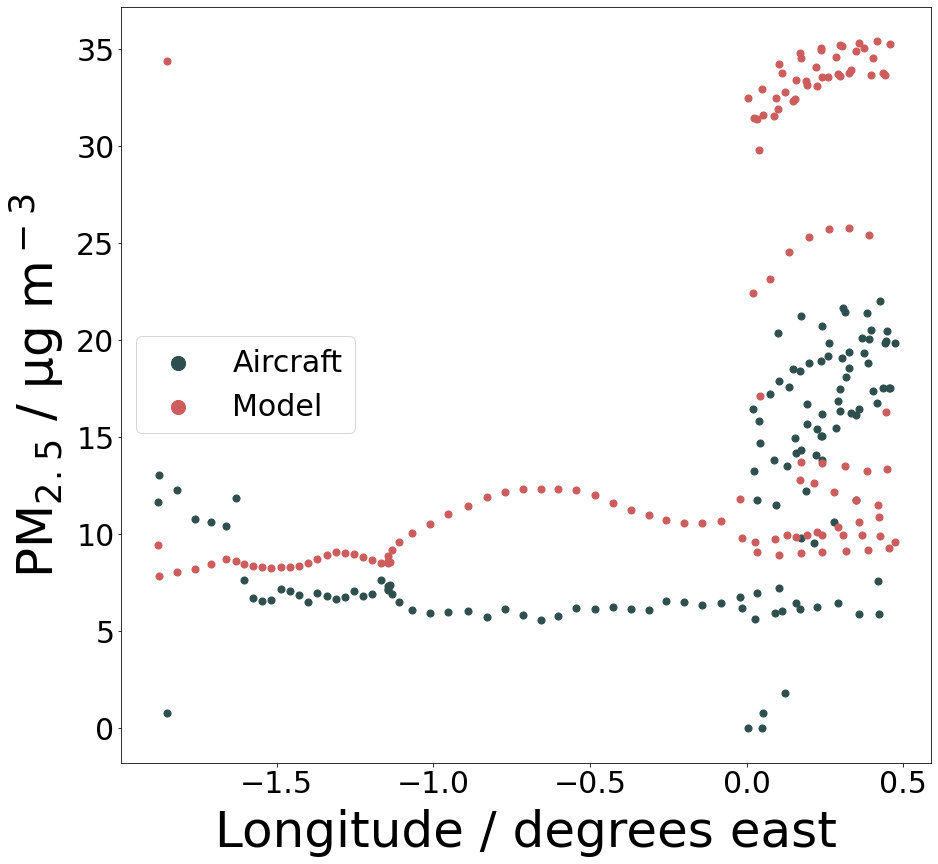

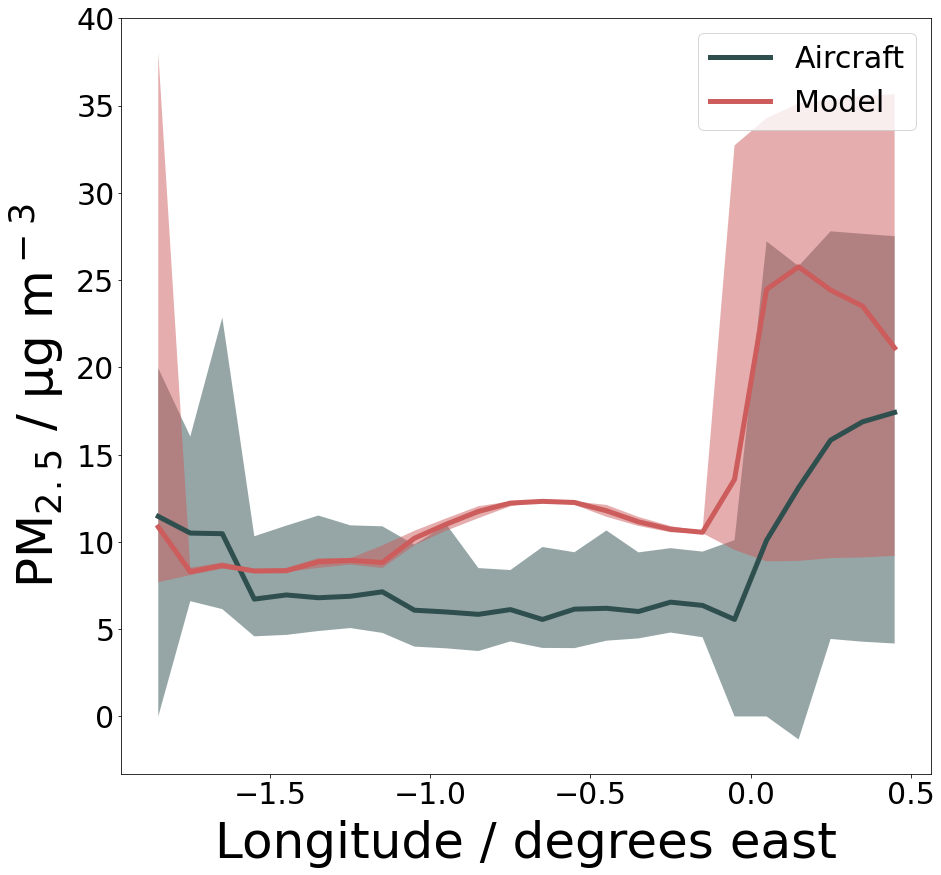

In [5]:
species_dict = pre.species_dictionary(flight_number)
setup = pre.setup_notebook(flight_number, model)
optns = setup[4]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'],model)
    
    if latitude:
        plot_profile('Latitude',df,resample_df,setup[5],key,label,optns['a_colour'],optns['m_colour'],optns['lat_bin'],optns['avg_method'],optns['min_method'],optns['max_method'],model)

    if longitude:
        plot_profile('Longitude',df,resample_df,setup[5],key,label,optns['a_colour'],optns['m_colour'],optns['lat_bin'],optns['avg_method'],optns['min_method'],optns['max_method'],model)